<a href="https://colab.research.google.com/github/iagoslopes/Mineracao_Dados-Iago/blob/master/Atividade_05102024_Iago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Atividade do dia 05/10/2024

Mineração de Dados

Nesta atividade vocês devem seguir o passo a passo a seguir encontrando uma
base de dados no formato CSV e executar os passos abaixo com os códigos
sugeridos em cada etapa. Observe que os códigos são exemplos que devem
ser alterados de acordo com a base de dados escolhida.

Esta atividade deve ser salva em um repositório do Github e o link enviado na
atividade correspondente.

Guia de Atividade: Análise de Dados com Google Colab (Foco no KDD)

Objetivo:

Realizar uma análise de dados em quatro etapas principais: busca por uma base
de dados, limpeza e estruturação dos dados, visualização e conclusões a partir
dos dados observados.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Examinando o dataset:

In [2]:
df = pd.read_csv("/content/ev_charging_patterns.csv")
df.head()

,User ID,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,User_1,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,User_2,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,User_3,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,User_4,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,User_5,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


Analisando quais colunas existem dentro do dataset:

In [3]:
df.columns

Index(['User ID', 'Vehicle Model', 'Battery Capacity (kWh)',
       'Charging Station ID', 'Charging Station Location',
       'Charging Start Time', 'Charging End Time', 'Energy Consumed (kWh)',
       'Charging Duration (hours)', 'Charging Rate (kW)',
       'Charging Cost (USD)', 'Time of Day', 'Day of Week',
       'State of Charge (Start %)', 'State of Charge (End %)',
       'Distance Driven (since last charge) (km)', 'Temperature (°C)',
       'Vehicle Age (years)', 'Charger Type', 'User Type'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   User ID                                   1320 non-null   object 
 1   Vehicle Model                             1320 non-null   object 
 2   Battery Capacity (kWh)                    1320 non-null   float64
 3   Charging Station ID                       1320 non-null   object 
 4   Charging Station Location                 1320 non-null   object 
 5   Charging Start Time                       1320 non-null   object 
 6   Charging End Time                         1320 non-null   object 
 7   Energy Consumed (kWh)                     1254 non-null   float64
 8   Charging Duration (hours)                 1320 non-null   float64
 9   Charging Rate (kW)                        1254 non-null   float64
 10  Charging Cost (USD)                 

Com base nas informações fornecidas, existem 1320 linhas e 20 colunas dentro do dataset. Porém podemos descartar a Coluna User ID, ja que não iremos utilizar

In [7]:
df.describe()

,Battery Capacity (kWh),Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years)
count,1320.000000,1254.000000,1320.000000,1254.000000,1320.000000,1320.000000,1320.000000,1254.000000,1320.000000,1320.000000
mean,74.534692,42.642894,2.269377,25.963003,22.551352,49.130012,75.141590,153.596788,15.263591,3.612843
std,20.626914,22.411705,1.061037,14.011326,10.751494,24.074134,17.080580,86.004987,14.831216,2.309824
min,1.532807,0.045772,0.095314,1.472549,0.234317,2.325959,7.604224,0.862361,-10.724770,0.000000
25%,62.000000,23.881193,1.397623,13.856583,13.368141,27.786903,62.053266,79.445335,2.800664,2.000000
50%,75.000000,42.691405,2.258136,25.603799,22.076360,48.241771,75.682496,152.259867,14.630846,4.000000
75%,85.000000,61.206218,3.112806,37.502998,31.646044,69.277921,88.201370,226.073284,27.981810,6.000000
max,193.003074,152.238758,7.635145,97.342255,69.407743,152.489761,177.708666,398.364775,73.169588,11.688592


# Limpando os dados

Agora iremos limpar alguns dados, pois não fornecem dados úteis para nossa análise, sendo esses campos: Unnamed: 0, designation, region_1, region_2, taster_name e taster_twitter_handle.

Antes de tudo, teremos que realizar uma cópia do DataFrame, para isso usamos o copy():

In [8]:
df1 = df.copy()

Agora que realizamos a cópia, vamos começar removendo as colunas que não vamos precisar:

In [9]:
df1.shape

(1320, 20)

In [10]:
df1.isna().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [11]:
df1.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),66
Charging Duration (hours),0
Charging Rate (kW),66


In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
energy_median = df1['Energy Consumed (kWh)'].median()
charging_rate_median = df1['Charging Rate (kW)'].median()
distance_driven_median = df1['Distance Driven (since last charge) (km)'].median()

df1['Energy Consumed (kWh)'].fillna(energy_median, inplace=True)
df1['Charging Rate (kW)'].fillna(charging_rate_median, inplace=True)
df1['Distance Driven (since last charge) (km)'].fillna(distance_driven_median, inplace=True)

In [14]:
df1.isnull().sum()

,0
User ID,0
Vehicle Model,0
Battery Capacity (kWh),0
Charging Station ID,0
Charging Station Location,0
Charging Start Time,0
Charging End Time,0
Energy Consumed (kWh),0
Charging Duration (hours),0
Charging Rate (kW),0


In [15]:
df1.duplicated().sum()

0

In [16]:
df1.nunique()

,0
User ID,1320
Vehicle Model,5
Battery Capacity (kWh),147
Charging Station ID,462
Charging Station Location,5
Charging Start Time,1320
Charging End Time,1309
Energy Consumed (kWh),1255
Charging Duration (hours),1320
Charging Rate (kW),1255


In [17]:
df1 = df1.drop(["User ID"], axis=1)
df1.head()

,Vehicle Model,Battery Capacity (kWh),Charging Station ID,Charging Station Location,Charging Start Time,Charging End Time,Energy Consumed (kWh),Charging Duration (hours),Charging Rate (kW),Charging Cost (USD),Time of Day,Day of Week,State of Charge (Start %),State of Charge (End %),Distance Driven (since last charge) (km),Temperature (°C),Vehicle Age (years),Charger Type,User Type
0,BMW i3,108.463007,Station_391,Houston,2024-01-01 00:00:00,2024-01-01 00:39:00,60.712346,0.591363,36.389181,13.087717,Evening,Tuesday,29.371576,86.119962,293.602111,27.947953,2.0,DC Fast Charger,Commuter
1,Hyundai Kona,100.000000,Station_428,San Francisco,2024-01-01 01:00:00,2024-01-01 03:01:00,12.339275,3.133652,30.677735,21.128448,Morning,Monday,10.115778,84.664344,112.112804,14.311026,3.0,Level 1,Casual Driver
2,Chevy Bolt,75.000000,Station_181,San Francisco,2024-01-01 02:00:00,2024-01-01 04:48:00,19.128876,2.452653,27.513593,35.667270,Morning,Thursday,6.854604,69.917615,71.799253,21.002002,2.0,Level 2,Commuter
3,Hyundai Kona,50.000000,Station_327,Houston,2024-01-01 03:00:00,2024-01-01 06:42:00,79.457824,1.266431,32.882870,13.036239,Evening,Saturday,83.120003,99.624328,199.577785,38.316313,1.0,Level 1,Long-Distance Traveler
4,Hyundai Kona,50.000000,Station_108,Los Angeles,2024-01-01 04:00:00,2024-01-01 05:46:00,19.629104,2.019765,10.215712,10.161471,Morning,Saturday,54.258950,63.743786,203.661847,-7.834199,1.0,Level 1,Long-Distance Traveler


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 19 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Vehicle Model                             1320 non-null   object 
 1   Battery Capacity (kWh)                    1320 non-null   float64
 2   Charging Station ID                       1320 non-null   object 
 3   Charging Station Location                 1320 non-null   object 
 4   Charging Start Time                       1320 non-null   object 
 5   Charging End Time                         1320 non-null   object 
 6   Energy Consumed (kWh)                     1320 non-null   float64
 7   Charging Duration (hours)                 1320 non-null   float64
 8   Charging Rate (kW)                        1320 non-null   float64
 9   Charging Cost (USD)                       1320 non-null   float64
 10  Time of Day                         

A partir de agora, o dataset esta sem dados nulos e pronto para a nossa análise.

# Análise exploratória

Podemos começar visualizando os modelos de veículos.

In [19]:
vehicle_model_counts = df1['Vehicle Model'].value_counts()
vehicle_model_counts

,count
Vehicle Model,
Tesla Model 3,280
Hyundai Kona,266
Nissan Leaf,260
BMW i3,258
Chevy Bolt,256


Agora para melhor visualização vamos colocar em um gráfico:

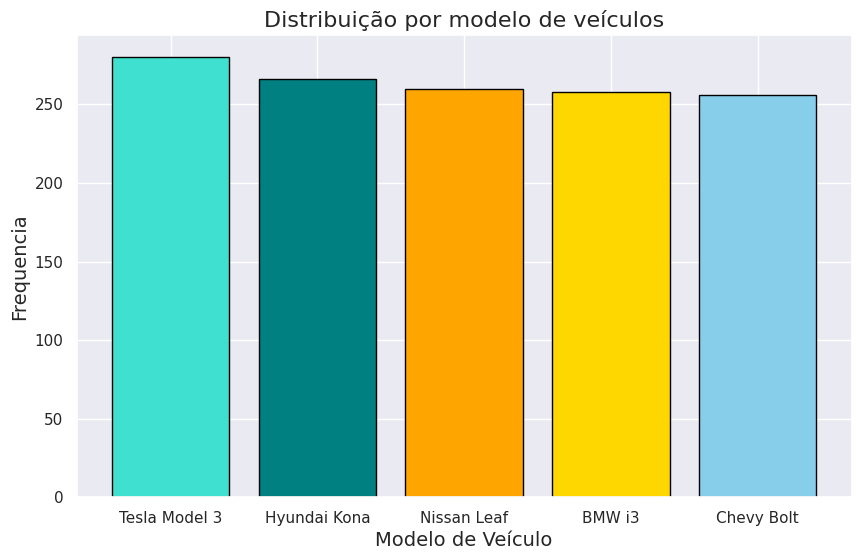

In [20]:
colors = ['turquoise', 'teal', 'orange', 'gold', 'skyblue']

plt.figure(figsize=(10,6))
plt.bar(vehicle_model_counts.index, vehicle_model_counts.values, color=colors[:len(vehicle_model_counts)], edgecolor='black')

plt.xticks(vehicle_model_counts.index, vehicle_model_counts.index, rotation=0)

plt.xlabel("Modelo de Veículo", fontsize=14)
plt.ylabel("Frequencia", fontsize=14)
plt.title("Distribuição por modelo de veículos", fontsize=16)

plt.show()

Fazendo a mesma coisa para os locais de carregamentos:

In [21]:
charge_loc_counts = df1['Charging Station Location'].value_counts()
charge_loc_counts

,count
Charging Station Location,
Los Angeles,297
San Francisco,264
Houston,262
New York,255
Chicago,242


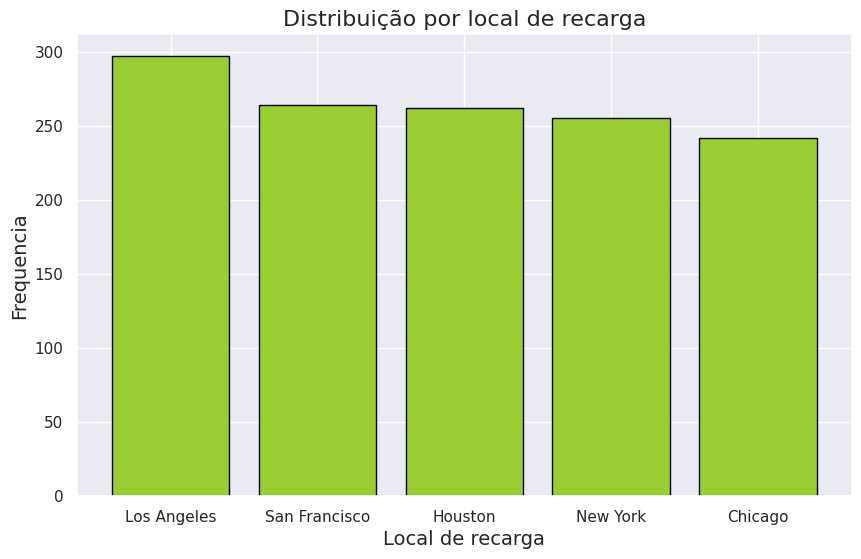

In [22]:
plt.figure(figsize=(10,6))
plt.bar(charge_loc_counts.index, charge_loc_counts.values, color='yellowgreen', edgecolor='black')

plt.xticks(charge_loc_counts.index, charge_loc_counts.index, rotation=0)

plt.xlabel("Local de recarga", fontsize=14)
plt.ylabel("Frequencia", fontsize=14)
plt.title("Distribuição por local de recarga", fontsize=16)

plt.show()

Certo! Vamos analisar quantas vezes é carregado nos perídos durante o dia:

In [23]:
df1['Time of Day'].value_counts()

,count
Time of Day,
Evening,362
Morning,336
Night,312
Afternoon,310


Existe um gráfico perfeito para esse tipo de visualização que é o gráfico de pizza, que nos mostra como fica a visualização desses dados:

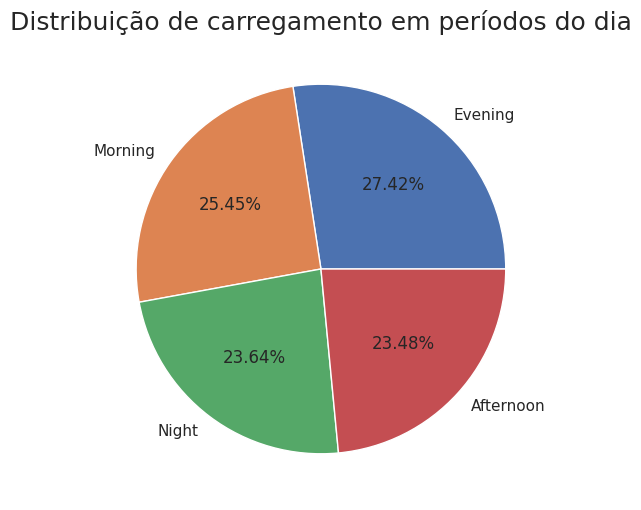

In [24]:
evening_counts = df1[df1['Time of Day']=='Evening']['Time of Day'].value_counts().values[0]
morning_counts = df1[df1['Time of Day']=='Morning']['Time of Day'].value_counts().values[0]
night_counts = df1[df1['Time of Day']=='Night']['Time of Day'].value_counts().values[0]
afternoon_counts = df1[df1['Time of Day']=='Afternoon']['Time of Day'].value_counts().values[0]

index_values = [evening_counts, morning_counts, night_counts, afternoon_counts]
index_labels=['Evening', 'Morning', 'Night', 'Afternoon']

plt.figure(figsize=(10,6))
plt.pie(index_values, labels =index_labels, autopct='%2.2f%%')
plt.title('Distribuição de carregamento em períodos do dia', fontsize=18)

plt.show()

Significa que o período do dia de maior carregamento é durante a noite com 27.42% dos carregamentos.

Mas podemos ver também quantas vezes por dia durante a semana:

In [25]:
day_of_the_week_counts = df1['Day of Week'].value_counts()
day_of_the_week_counts

,count
Day of Week,
Saturday,205
Tuesday,200
Wednesday,197
Sunday,191
Friday,188
Monday,185
Thursday,154


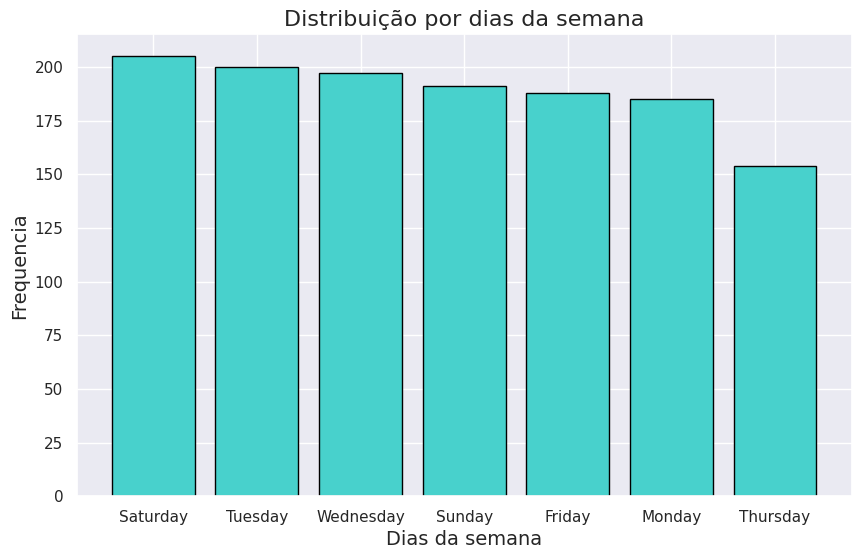

In [26]:
plt.figure(figsize=(10,6))
plt.bar(day_of_the_week_counts.index, day_of_the_week_counts.values, color='mediumturquoise', edgecolor='black')

plt.xticks(day_of_the_week_counts.index, day_of_the_week_counts.index, rotation=0)

plt.xlabel("Dias da semana", fontsize=14)
plt.ylabel("Frequencia", fontsize=14)
plt.title("Distribuição por dias da semana", fontsize=16)

plt.show()

Com base nesse gráfico podemos analisar que as pessoas tem um prefência por carregar o veículo durante o sábado, provavelmente o dia que as pessoas saem mais, porém não fica distante de outros dias, apenas um pouco a frente.

Vamos analisar a Frequencia de carregamento por Local, usuário e tipo de carregamento:

In [27]:
charger_type_counts = df1['Charger Type'].value_counts()
charger_type_counts

,count
Charger Type,
Level 1,459
Level 2,431
DC Fast Charger,430


In [28]:
user_type_counts = df1['User Type'].value_counts()
user_type_counts

,count
User Type,
Commuter,476
Long-Distance Traveler,437
Casual Driver,407


In [29]:
user_type_counts = df1['Charging Station Location'].value_counts()
user_type_counts

,count
Charging Station Location,
Los Angeles,297
San Francisco,264
Houston,262
New York,255
Chicago,242


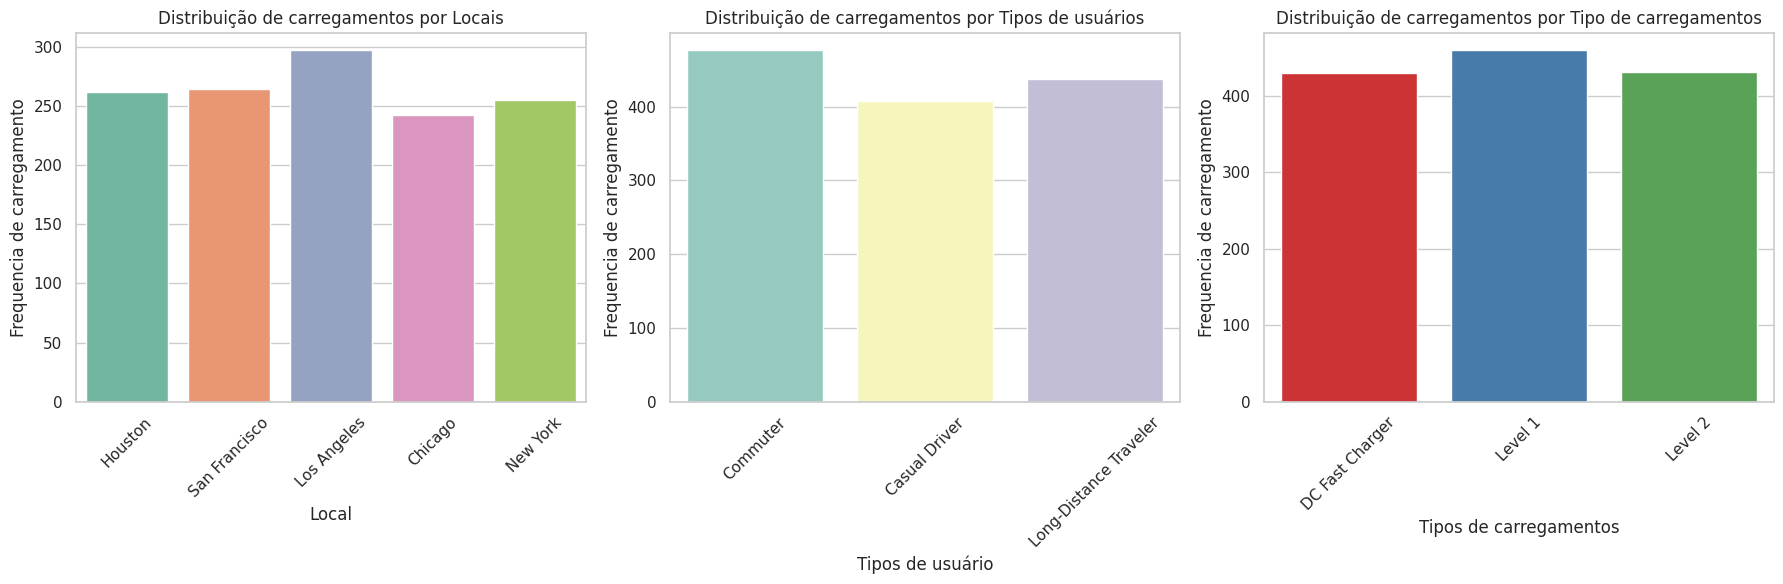

In [30]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], data=df1, x='Charging Station Location', palette='Set2')
axes[0].set_title('Distribuição de carregamentos por Locais')
axes[0].set_xlabel('Local')
axes[0].set_ylabel('Frequencia de carregamento')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1], data=df1, x='User Type', palette='Set3')
axes[1].set_title('Distribuição de carregamentos por Tipos de usuários')
axes[1].set_xlabel('Tipos de usuário')
axes[1].set_ylabel('Frequencia de carregamento')
axes[1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[2], data=df1, x='Charger Type', palette='Set1')
axes[2].set_title('Distribuição de carregamentos por Tipo de carregamentos')
axes[2].set_xlabel('Tipos de carregamentos')
axes[2].set_ylabel('Frequencia de carregamento')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Fica bem equilibrado os tipos de carregamentos, sendo o Level 1 o mais utilizado dentre os 3.

Ja para os tipos de usuários, quem mais utiliza são os viajantes.

Para o local mais utilizado, Los Angeles tem mais costumes de ter pessoas carregando seus veículos nessa região.

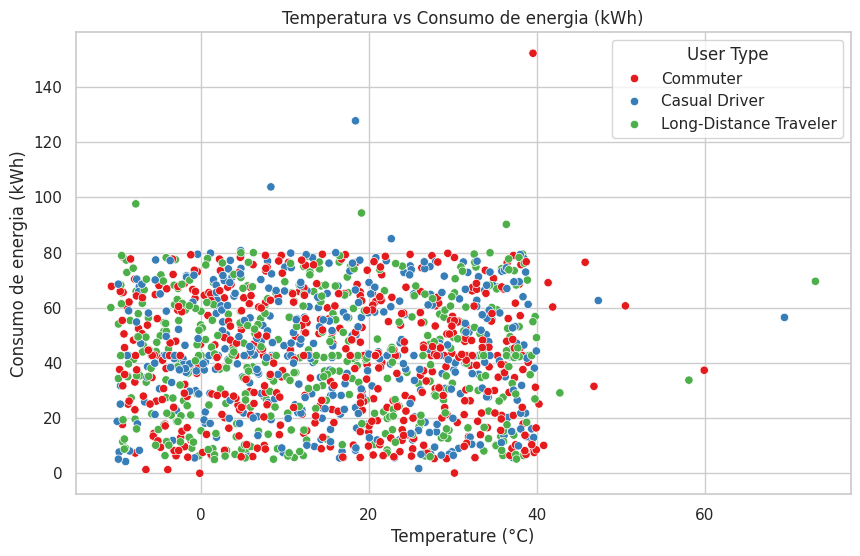

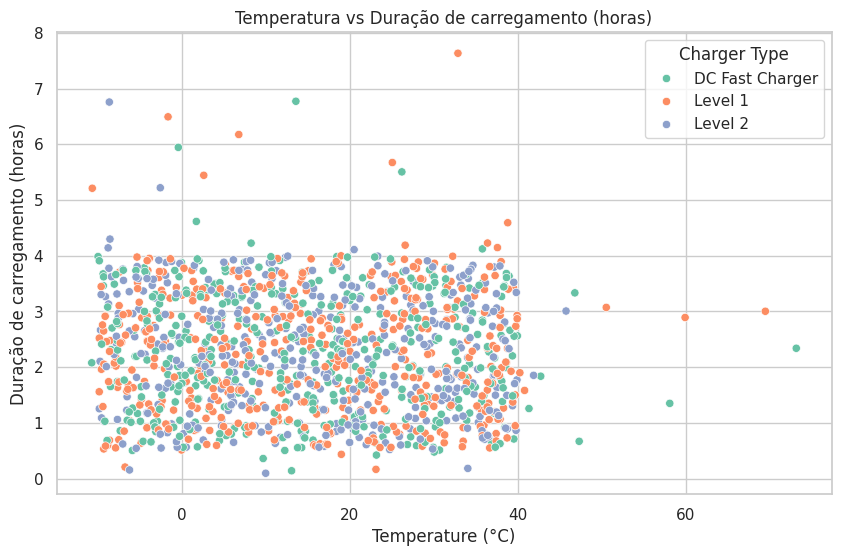

In [31]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Temperature (°C)', y='Energy Consumed (kWh)', hue='User Type', palette='Set1')
plt.title('Temperatura vs Consumo de energia (kWh)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Consumo de energia (kWh)')
plt.legend(title='User Type', loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='Temperature (°C)', y='Charging Duration (hours)', hue='Charger Type', palette='Set2')
plt.title('Temperatura vs Duração de carregamento (horas)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Duração de carregamento (horas)')
plt.legend(title='Charger Type', loc='upper right')
plt.show()

Agora obtemos a relação entre temperatura e consumo/duração do carregamento, podendo analisar se existe uma relação entre eles.

Criando um boxplot para uma relação de eficiência por tipo de carregamento:

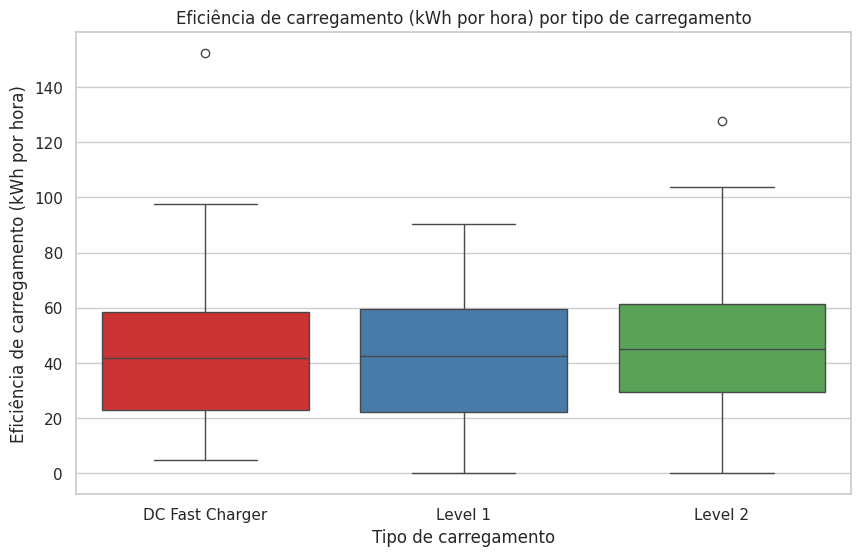

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Charger Type', y='Energy Consumed (kWh)', palette='Set1')
plt.title('Eficiência de carregamento (kWh por hora) por tipo de carregamento')
plt.xlabel('Tipo de carregamento')
plt.ylabel('Eficiência de carregamento (kWh por hora)')
plt.xticks(rotation=0)
plt.show()

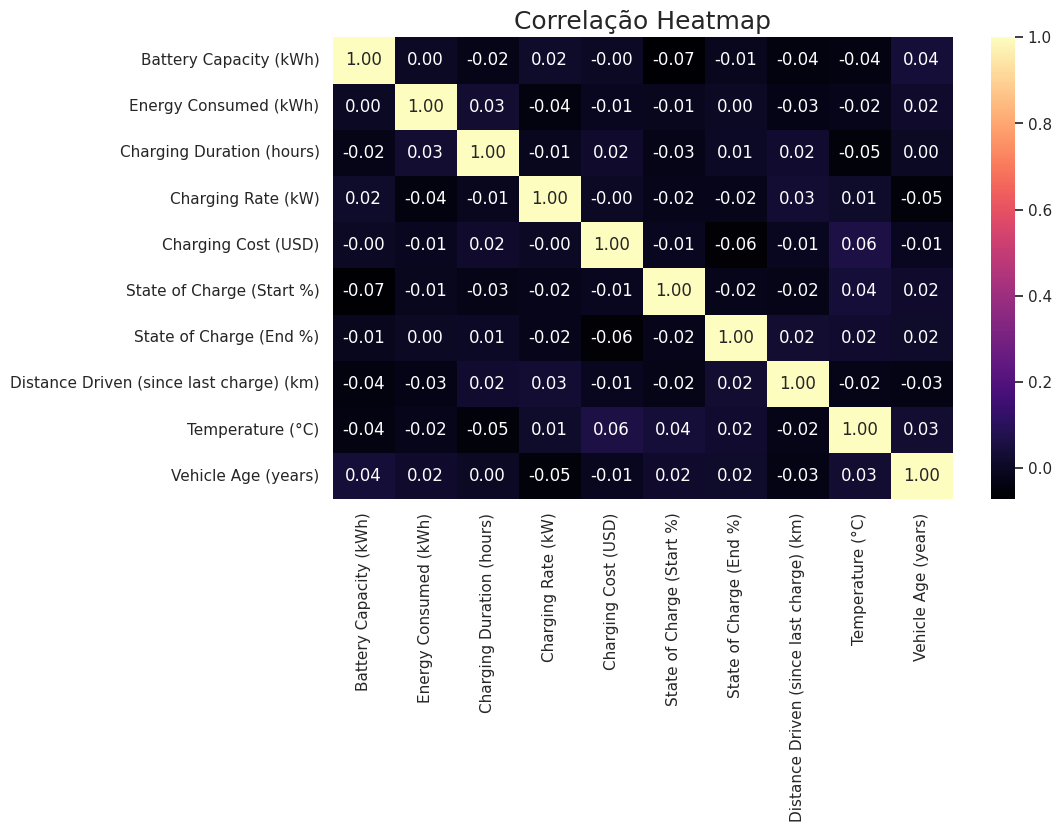

In [33]:
plt.figure(figsize=(10,6))
corr_matrix = df1.drop(columns=['Vehicle Model', 'Charging Station ID', 'Charging Station Location', 'Charging Start Time', 'Charging End Time', 'Time of Day', 'Day of Week', 'Charger Type', 'User Type']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlação Heatmap', fontsize=18)
plt.show()

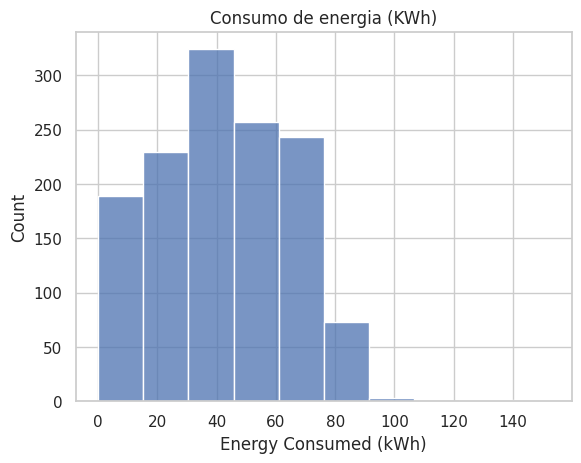

In [34]:
sns.histplot(df1["Energy Consumed (kWh)"], bins=10)
plt.title('Consumo de energia (KWh)')
plt.show()

Interessante, temos uma percepção de que o consumo sempre será estravagante, mas vemos um tendência a ficar na esquerda, com um consumo relativamente baixo do que imaginamos.

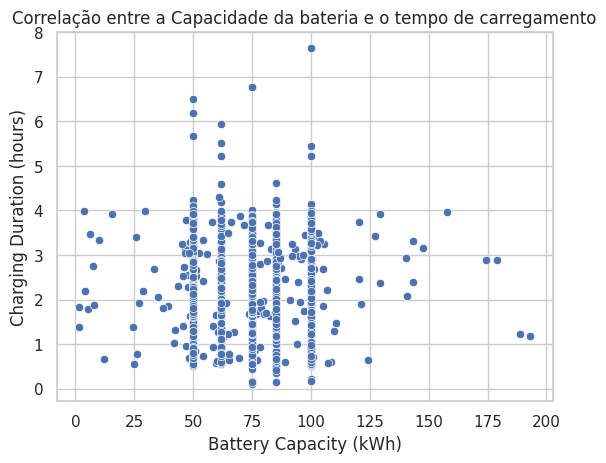

In [35]:
sns.scatterplot(x="Battery Capacity (kWh)", y="Charging Duration (hours)", data=df1)
plt.title("Correlação entre a Capacidade da bateria e o tempo de carregamento")
plt.show()

Ja nesse gráfico, podemos analisar se tem uma correlação entre a capacidade e o tempo de carregamento, ou seja, se quanto maior a capacidade da bateria do veículo maior o tempo de carregamento da mesma. E por incrível que pareca, não é totalmente verdade, os maiores picos de tempo não estão relacionados a maior capacidade da bateria, isso realmente me impressionou.

# Conclusão

Agora podemos finalmente responder as perguntas que recebemos no começo do projeto.

* **Quais padrões você observou nas variáveis numéricas? (exemplo:
distribuição normal, outliers)**

   *R: Dentre as análises feitas nas variáveis númericas, podemos afirmar que não existe uma tendência a fugir do padrão dos dados presente, por exemplo, ao meu ver seguindo a análise de correlação entre capacidade e o tempo de carregamento não tem muitos dados que fojem do padrão ali presente.*

* **Como estão distribuídas as variáveis categóricas? Alguma categoria se
destaca em termos de frequência?**

   *R: As variáveis categóricas estão bem distribuidas, todas bem próximas uma das outras, salvo uma que sempre esta mais acima do que as outras, mas bem pouco.*

* **Você identificou correlações entre variáveis numéricas? Qual pode ser a
relação entre essas variáveis?**

   *R: Não, em todas as análises das variáveis numéricas estão sempre nos "padrões", por exemplo, seguindo a análise de temperatura e tempo de carregamento, não estão relacionadas, ja que em suma maioria o tempo maior não esta relacionado com a maior temperatura e vice versa, esta bem distribuido.*

* **Com base nos dados, quais são as principais conclusões que você pode
tirar? O que essas conclusões indicam para o contexto do dataset
escolhido?**

   *R: Nas regiões em que esses dados pertencem, existe um certo equilíbrio, ja que não tem uma região ao certo que usa o carregamento muito mais que outras(um número discrepante), são sempre valores quase iguais, claro que as análises mostram sempre que um dado é maior que o outro, por exemplo, Los Angeles é um local mais utilizado que outros, mas esse número não é discrepante ao ponto de assustar, ja que as outras regiões são utilizadas quase que a mesma coisa, podemos tirar de conclusão que as variáveis não estão relacionadas, não é por que a bateria tem maior capacidade que demora mais, temperatura, etc. Única análise que mostrou uma forte tendência foi o de consumo de energia, que mostrou bem mais abaixo do que minha espectativa para carros elétricos, tendo uma curva maior para a esquerda.*